In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
all_data = pd.read_csv("all_data.csv", index_col = 'id')

In [3]:
all_data.head(2)

,bio,email,dob,gender,fav_food,fav_sports,fav_song,profile_image_url,full_name,phone_number,...,points,created_at,updated_at,questions_answered,is_in_spotlight_right_now,super_likes,spotlight_start_time,redeem_code,reference_username,partner_id
id,,,,,,,,,,,,,,,,,,,,,
1281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-02-13 15:56:19.912499,2020-02-14 21:00:44.096822,[],NaN,[],NaN,NaN,NaN,NaN
1290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-02-15 01:57:35.241635,2020-02-16 11:26:17.092611,[],NaN,[],NaN,NaN,NaN,NaN


In [4]:
selected_data = all_data[['gender','fav_food','fav_sports','fav_song','country_living_in','country_of_origin','education',
                         'family_size','height','hobbies','marriage_history','occupation','role','weight','city','age',
                         'personality_categories']]
selected_data.head(2)

,gender,fav_food,fav_sports,fav_song,country_living_in,country_of_origin,education,family_size,height,hobbies,marriage_history,occupation,role,weight,city,age,personality_categories
id,,,,,,,,,,,,,,,,,
1281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,[]
1290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,[]


In [5]:
for i in selected_data:
    print("Unique values for " + i + " including nan: ")
    print(selected_data[i].unique())
    print("Count of unique values for " + i + " including nan: ")
    print(len(selected_data[i].unique()))
    print("Count of unique values for " + i + " not including nan: ")
    print(selected_data[i].nunique())

Unique values for gender including nan: 
[nan 'Female' 'Male' 'Man' 'Woman' 'male' 'female']
Count of unique values for gender including nan: 
7
Count of unique values for gender not including nan: 
6
Unique values for fav_food including nan: 
[nan 'Biryani' 'Pizza' 'Sweet and Sour Chicken ' 'Tacos' 'Partha'
 'Burgers' 'Rice']
Count of unique values for fav_food including nan: 
8
Count of unique values for fav_food not including nan: 
7
Unique values for fav_sports including nan: 
[nan 'Soccer' 'Cricket ' 'basketball' 'Cricket' 'Football' 'cricket']
Count of unique values for fav_sports including nan: 
7
Count of unique values for fav_sports not including nan: 
6
Unique values for fav_song including nan: 
[nan 'Pop music ' 'Blues' 'Classic ' 'Rock' 'RDB' 'Funk ' 'Jazz' 'Hip hop'
 'Soul Music ' 'Pop']
Count of unique values for fav_song including nan: 
11
Count of unique values for fav_song not including nan: 
10
Unique values for country_living_in including nan: 
[nan 'USA' 'Pakistan '

In [6]:
for i in selected_data.columns:
    missing_values_percentage = (selected_data[i].isna().sum()/len(selected_data))*100
    if missing_values_percentage > 75:
        new_data = selected_data.drop(i, axis=1)
new_data = new_data.dropna(axis = 0)
new_data = new_data.drop('age', axis = 1)
new_data.isna().sum()

gender                    0
fav_food                  0
fav_sports                0
fav_song                  0
country_living_in         0
country_of_origin         0
education                 0
family_size               0
height                    0
hobbies                   0
marriage_history          0
occupation                0
weight                    0
city                      0
personality_categories    0
dtype: int64

In [7]:
for i in new_data.columns:
    print(i + " " + str(len(pd.unique(new_data[i]))) + " : " + str(pd.unique(new_data[i])))

gender 3 : ['Female' 'Male' 'female']
fav_food 7 : ['Biryani' 'Pizza' 'Sweet and Sour Chicken ' 'Tacos' 'Partha' 'Burgers'
 'Rice']
fav_sports 6 : ['Soccer' 'Cricket ' 'basketball' 'Cricket' 'Football' 'cricket']
fav_song 10 : ['Pop music ' 'Blues' 'Classic ' 'Rock' 'RDB' 'Funk ' 'Jazz' 'Hip hop'
 'Soul Music ' 'Pop']
country_living_in 2 : ['USA' 'Pakistan ']
country_of_origin 4 : ['Indonesia ' 'USA' 'India ' 'Pakistan ']
education 2 : ['Bachelors ' 'Master ']
family_size 9 : ['5' '10' '3' '7' '4' '6' '9' '2' '8']
height 12 : ['5 foot 4 inches' '6 feet 0 inches' '5 foot 3 inches' '5 foot 6 inches'
 '5 foot 2 inches' '5 feet 11 inches' '5 feet 12 inches' '5 foot 5 inches'
 '5 feet 7 inches' '5 feet 8 inches' '5 feet 9 inches' '6 feet 1 inches']
hobbies 49 : ['Dancing' 'Entertaining' 'Gardening' 'Sewing' 'Playing Music'
 'Listening to Music' 'Going to Movies' 'Exercise' 'Socializing'
 'Bicycling' 'Housework' 'Playing Cards' 'Shopping' 'Crafts' 'Eating Out'
 'Reading' 'Theater' 'Beach' 'P

In [8]:
new_data.gender.replace(['female','Woman'],'Female', inplace = True)
new_data.gender.replace(['male','Man'],'Male', inplace = True)
new_data.fav_food.replace('Sweet and Sour Chicken ','Sweet and Sour Chicken', inplace = True)
new_data.fav_sports.replace(['Cricket ','cricket'],'Cricket', inplace = True)
new_data.fav_sports.replace('basketball','Basketball', inplace = True)
new_data.fav_song.replace('Pop music ','Pop', inplace = True)
new_data.fav_song.replace('Classic ','Classic', inplace = True)
new_data.fav_song.replace('Funk ','Funk', inplace = True)
new_data.fav_song.replace('Soul Music ','Soul Music', inplace = True)
new_data.country_living_in.replace('Pakistan ','Pakistan', inplace = True)
new_data.country_living_in.replace('United States','USA', inplace = True)
new_data.country_of_origin.replace('Indonesia ','Indonesia', inplace = True)
new_data.country_of_origin.replace('Pakistan ','Pakistan', inplace = True)
new_data.country_of_origin.replace('United States','USA', inplace = True)
new_data.country_of_origin.replace('India ','India', inplace = True)
new_data.education.replace('Bachelors ','Bachelors', inplace = True)
new_data.education.replace('Master ','Master', inplace = True)
new_data.city.replace('Lansing ','Lansing', inplace = True)
new_data.city.replace('Okemos ','Okemos', inplace = True)
new_data.city.replace('Islamabad ','Islamabad', inplace = True)
new_data.city.replace('Karachi ','Karachi', inplace = True)

In [9]:
new_height = []
for i in new_data['height']:
    res = [int(j) for j in i.split() if j.isdigit()]
    dec = round(float(res[0]) + (res[1]/12.0),2)
    new_height.append(dec)
new_data['height'] = new_height

In [10]:
new_weight = []
for i in new_data['weight']:
    res = [int(j) for j in i.split() if j.isdigit()]
    new_weight.append(res[0])
new_data['weight'] = new_weight

In [11]:
new_data.head(2)

,gender,fav_food,fav_sports,fav_song,country_living_in,country_of_origin,education,family_size,height,hobbies,marriage_history,occupation,weight,city,personality_categories
id,,,,,,,,,,,,,,,
1000,Female,Biryani,Soccer,Pop,USA,Indonesia,Bachelors,5,5.33,Dancing,Never,Radiologic technologist,154,Lansing,"[""Social""]"
968,Female,Pizza,Cricket,Pop,USA,USA,Master,5,5.33,Entertaining,Never,Brand manager,140,Okemos,"[""Social""]"


In [12]:
final_data = new_data.drop(['hobbies','personality_categories','city'], axis = 1)
final_data.family_size = pd.to_numeric(final_data.family_size)

In [13]:
final_data.head(2)

,gender,fav_food,fav_sports,fav_song,country_living_in,country_of_origin,education,family_size,height,marriage_history,occupation,weight
id,,,,,,,,,,,,
1000,Female,Biryani,Soccer,Pop,USA,Indonesia,Bachelors,5,5.33,Never,Radiologic technologist,154
968,Female,Pizza,Cricket,Pop,USA,USA,Master,5,5.33,Never,Brand manager,140


In [14]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 1000 to 1024
Data columns (total 12 columns):
gender               301 non-null object
fav_food             301 non-null object
fav_sports           301 non-null object
fav_song             301 non-null object
country_living_in    301 non-null object
country_of_origin    301 non-null object
education            301 non-null object
family_size          301 non-null int64
height               301 non-null float64
marriage_history     301 non-null object
occupation           301 non-null object
weight               301 non-null int64
dtypes: float64(1), int64(2), object(9)
memory usage: 30.6+ KB


In [15]:
final_data.describe()

,family_size,height,weight
count,301.000000,301.000000,301.000000
mean,5.023256,5.561827,168.285714
std,1.968787,0.293284,48.367049
min,2.000000,5.170000,101.000000
25%,4.000000,5.330000,130.000000
50%,5.000000,5.500000,155.000000
75%,6.000000,5.750000,210.000000
max,10.000000,6.080000,268.000000


In [16]:
final_cat = final_data.select_dtypes(include = 'object').copy()
final_num = final_data.select_dtypes(include = ['int64','float64'])
print("Categorical Data: ")
print(final_cat.head(2))
print(" ")
print("Numeric Data: ")
print(final_num.head(2))

Categorical Data: 
      gender fav_food fav_sports fav_song country_living_in country_of_origin  \
id                                                                              
1000  Female  Biryani     Soccer      Pop               USA         Indonesia   
968   Female    Pizza    Cricket      Pop               USA               USA   

      education marriage_history               occupation  
id                                                         
1000  Bachelors            Never  Radiologic technologist  
968      Master            Never            Brand manager  
 
Numeric Data: 
      family_size  height  weight
id                               
1000            5    5.33     154
968             5    5.33     140


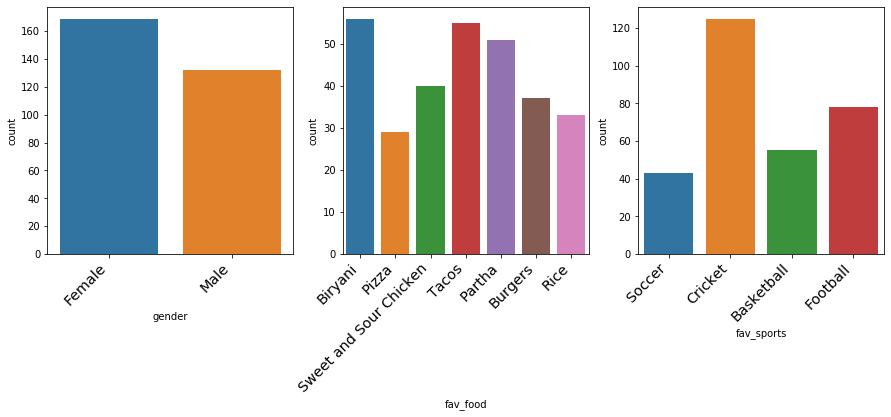

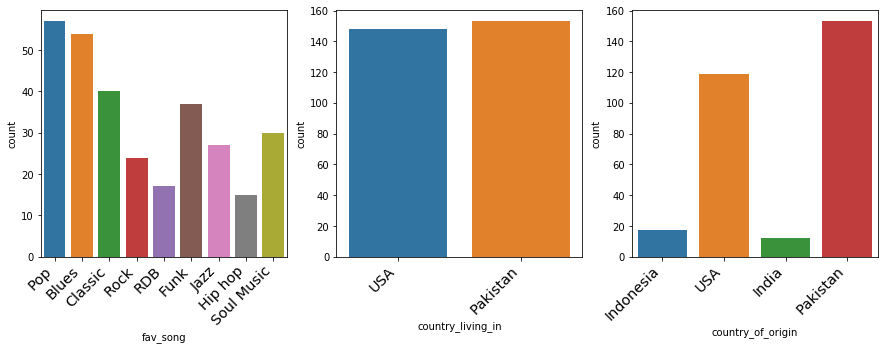

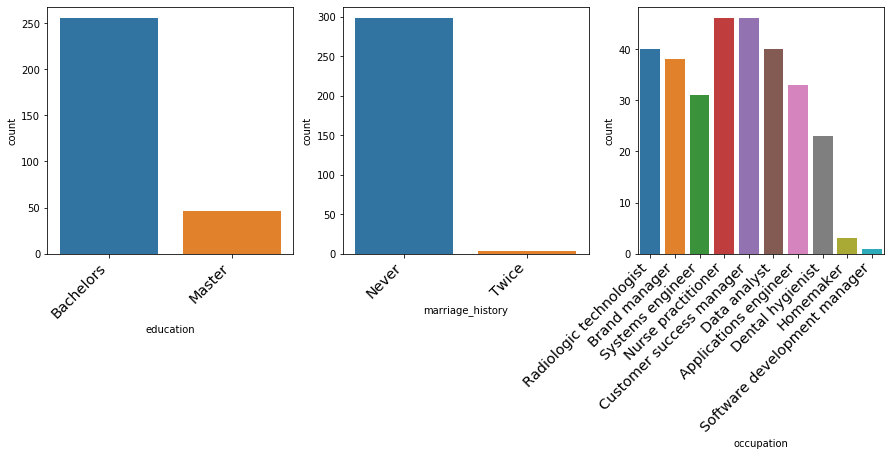

<Figure size 1080x720 with 0 Axes>

In [17]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(final_cat.columns):
    if ix <= 3:
        ax1 = fig.add_subplot(2,3,ix)
        sns.countplot(data = final_cat, x=c, ax = ax1)
        plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

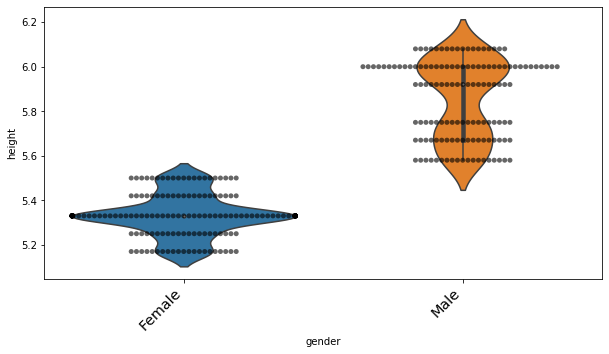

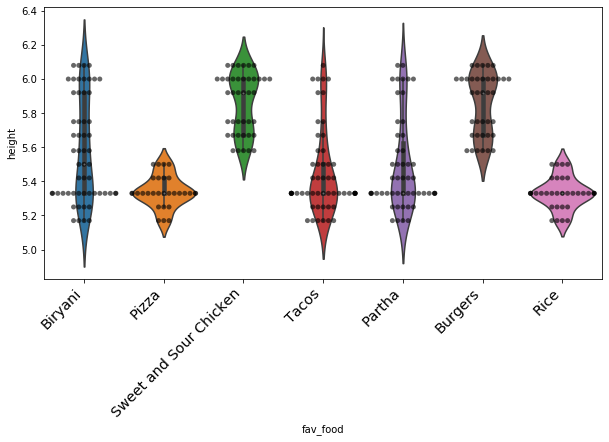

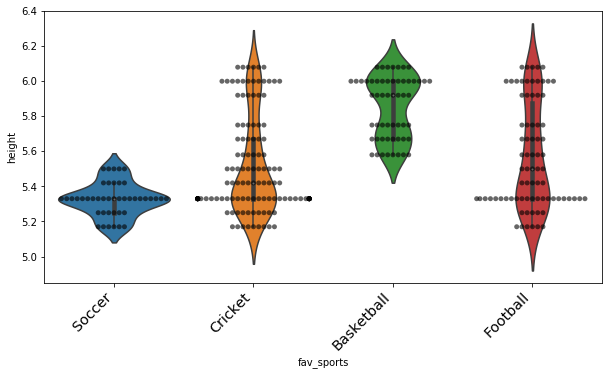

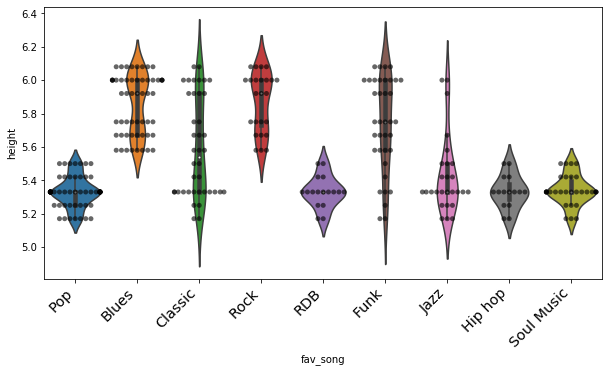

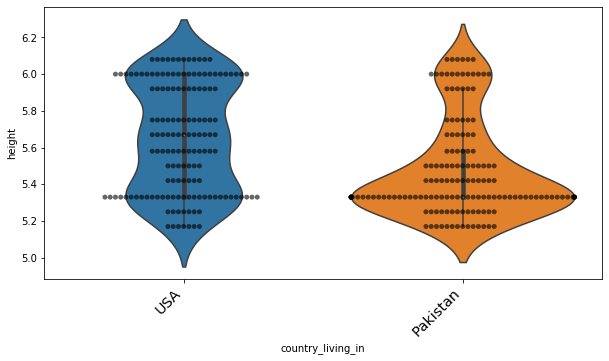

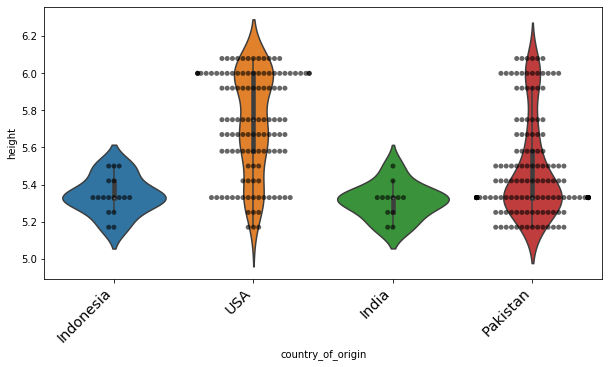

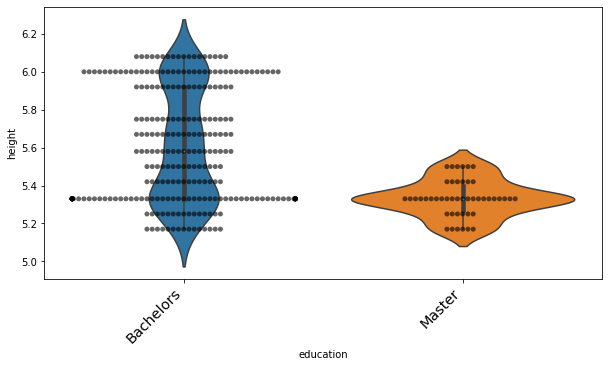

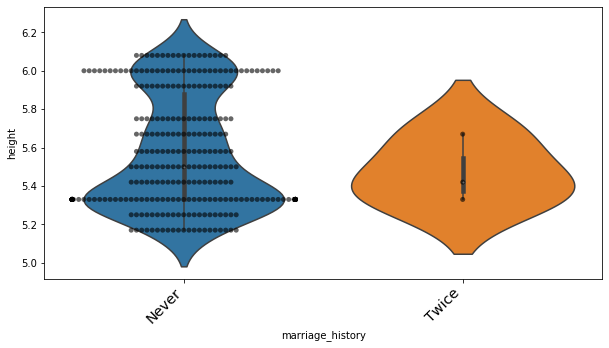

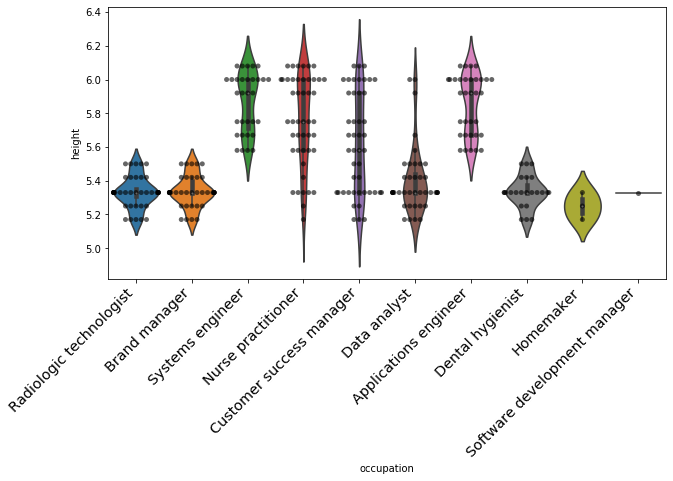

In [18]:
for i in final_cat.columns:
    plt.figure(i, figsize=(10,5))
    sns.violinplot(data = final_data, x = i, y = 'height')
    sns.swarmplot(data = final_data, x = i, y = 'height', color = 'k', alpha = 0.6)
    plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

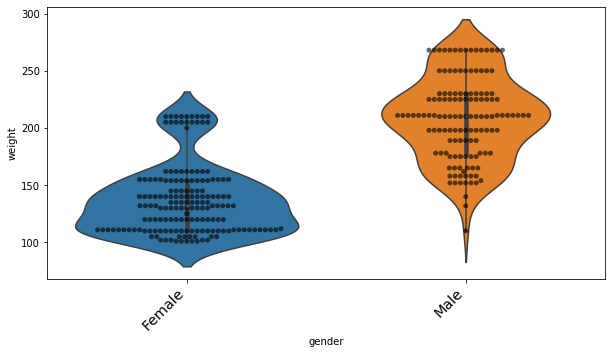

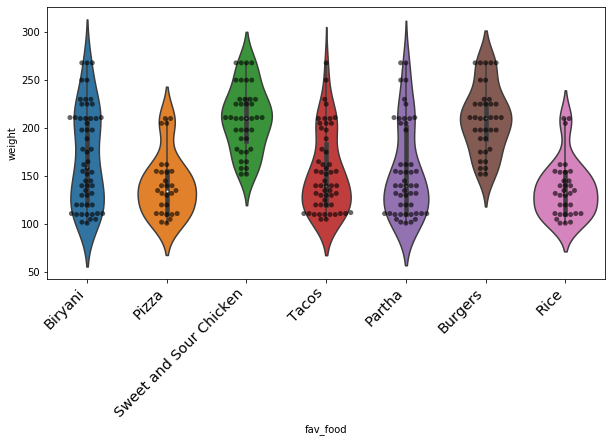

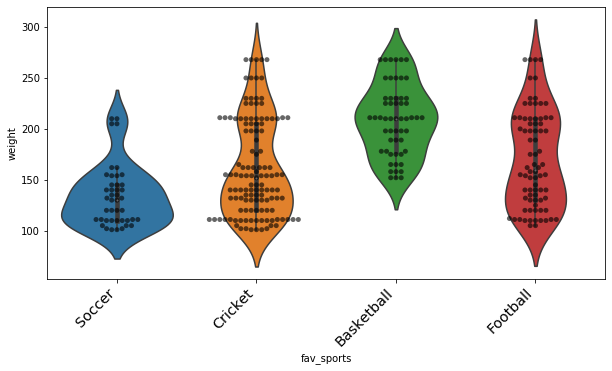

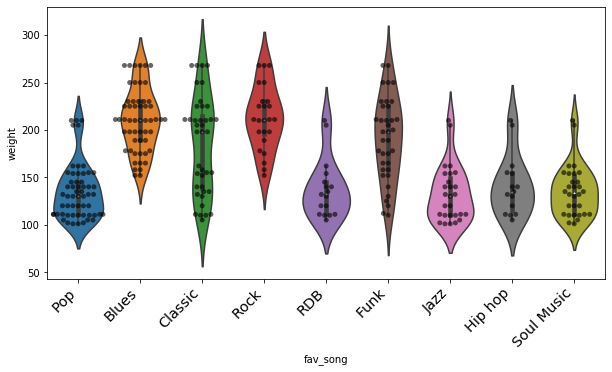

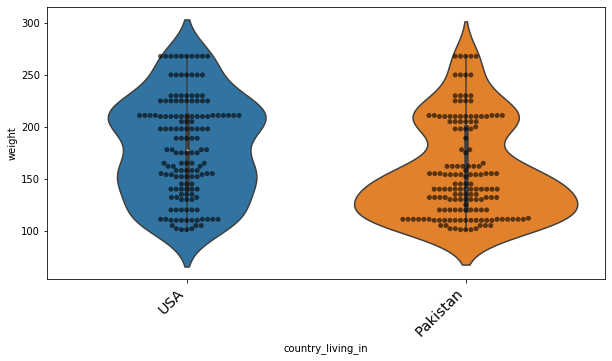

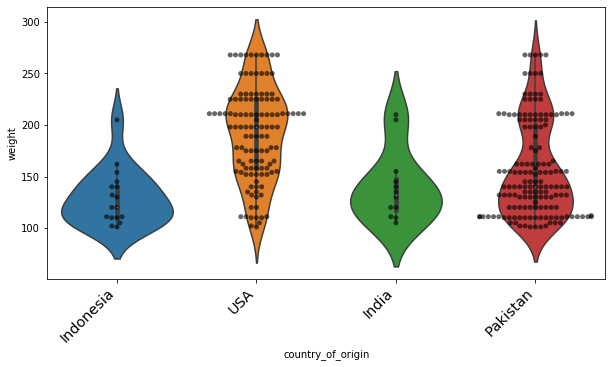

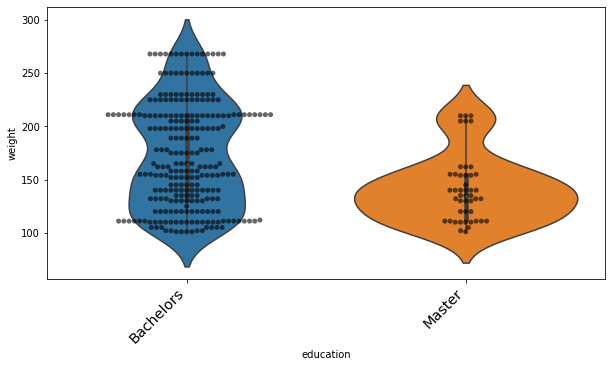

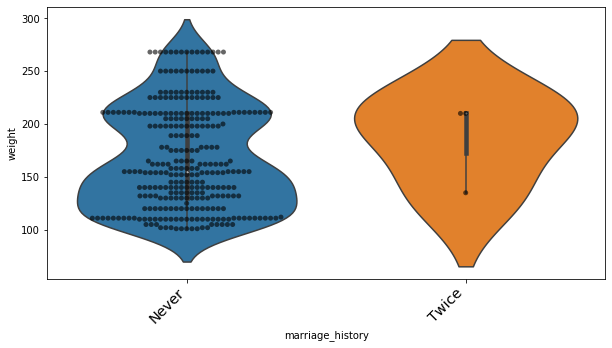

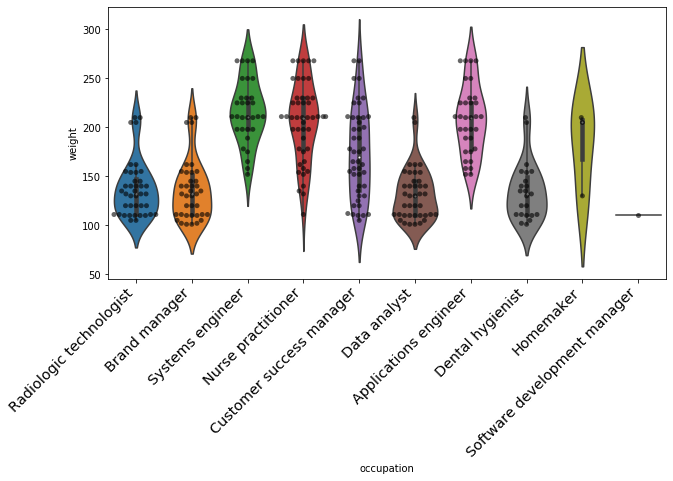

In [19]:
for i in final_cat.columns:
    plt.figure(i, figsize=(10,5))
    sns.violinplot(data = final_data, x = i, y = 'weight')
    sns.swarmplot(data = final_data, x = i, y = 'weight', color = 'k', alpha = 0.6)
    plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

In [45]:
labelencoder = LabelEncoder()
encoded = final_cat[['education' , 'marriage_history']]
data = final_cat[['fav_food','fav_sports','fav_song','country_living_in','country_of_origin','occupation']]
for i in encoded.columns:
    encoded[i] = labelencoder.fit_transform(encoded[i])
encoded['education'] += 1
data = pd.get_dummies(data)
# Instantiating the Scaler
scaler = MinMaxScaler()
# Scaling the categories
encoded = pd.DataFrame(scaler.fit_transform(encoded), index = data.index, columns = ['education', 'marriage_history'])
final_num = pd.DataFrame(scaler.fit_transform(final_num), index = data.index, columns = ['family_size', 'height', 'weight'])

C:\Users\Saba\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Saba\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
data.head()

,fav_food_Biryani,fav_food_Burgers,fav_food_Partha,fav_food_Pizza,fav_food_Rice,fav_food_Sweet and Sour Chicken,fav_food_Tacos,fav_sports_Basketball,fav_sports_Cricket,fav_sports_Football,...,occupation_Applications engineer,occupation_Brand manager,occupation_Customer success manager,occupation_Data analyst,occupation_Dental hygienist,occupation_Homemaker,occupation_Nurse practitioner,occupation_Radiologic technologist,occupation_Software development manager,occupation_Systems engineer
id,,,,,,,,,,,,,,,,,,,,,
1000,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
968,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1103,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
975,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
979,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [47]:
encoded.head()

,education,marriage_history
id,,
1000,0.0,0.0
968,1.0,0.0
1103,0.0,0.0
975,1.0,0.0
979,1.0,0.0


In [48]:
final_num.head()

,family_size,height,weight
id,,,
1000,0.375,0.175824,0.317365
968,0.375,0.175824,0.233533
1103,1.000,0.912088,0.658683
975,0.125,0.175824,0.263473
979,0.625,0.087912,0.185629


In [49]:
X = pd.concat([data,encoded,final_num], axis = 1)

In [50]:
X.head()

,fav_food_Biryani,fav_food_Burgers,fav_food_Partha,fav_food_Pizza,fav_food_Rice,fav_food_Sweet and Sour Chicken,fav_food_Tacos,fav_sports_Basketball,fav_sports_Cricket,fav_sports_Football,...,occupation_Homemaker,occupation_Nurse practitioner,occupation_Radiologic technologist,occupation_Software development manager,occupation_Systems engineer,education,marriage_history,family_size,height,weight
id,,,,,,,,,,,,,,,,,,,,,
1000,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.0,0.0,0.375,0.175824,0.317365
968,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1.0,0.0,0.375,0.175824,0.233533
1103,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0.0,0.0,1.000,0.912088,0.658683
975,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0.0,0.125,0.175824,0.263473
979,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0.0,0.625,0.087912,0.185629


In [51]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
s_scores_agg = []

db_scores_agg = []

s_scores_km = []

db_scores_km = []

# Looping through different iterations for the number of clusters
for i in cluster_cnt:
    
    # Hierarchical Agglomerative Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(X)
    
    cluster_assignments_agg = hac.labels_
    
    ## KMeans Clustering with different number of clusters
    k_means = KMeans(n_clusters=i)
    
    k_means.fit(X)
    
    cluster_assignments_km = k_means.predict(X)
    
    # Appending the scores to the empty lists    
    s_scores_agg.append(silhouette_score(X, cluster_assignments_agg))
    
    db_scores_agg.append(davies_bouldin_score(X, cluster_assignments_agg))
    
    s_scores_km.append(silhouette_score(X, cluster_assignments_km))
    
    db_scores_km.append(davies_bouldin_score(X, cluster_assignments_km))

Max Value:
Cluster #     Cluster Score
19       0.604219

Min Value:
Cluster #    Cluster Score
2       0.286599


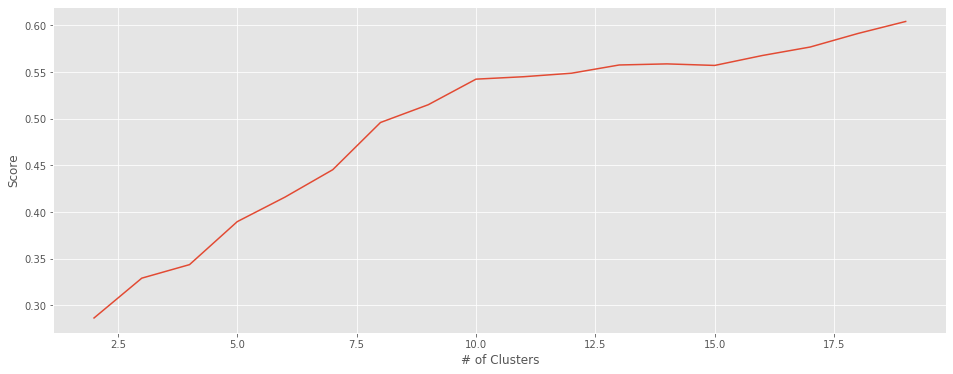

Max Value:
Cluster #    Cluster Score
2       1.581267

Min Value:
Cluster #     Cluster Score
19        0.68992


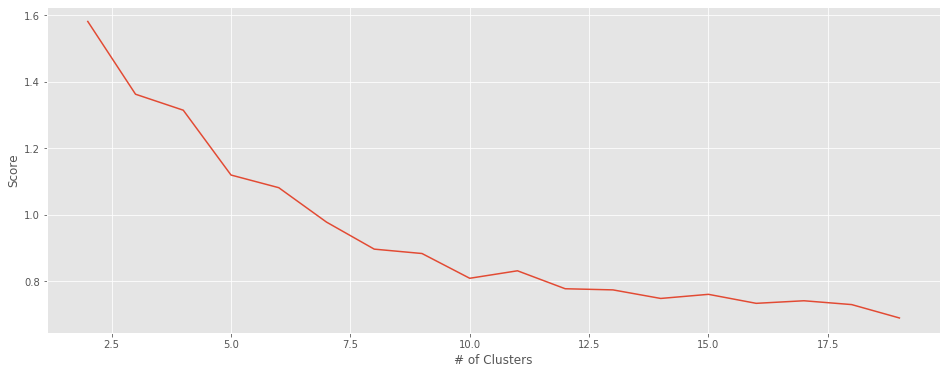

Max Value:
Cluster #     Cluster Score
19       0.611483

Min Value:
Cluster #    Cluster Score
2       0.286599


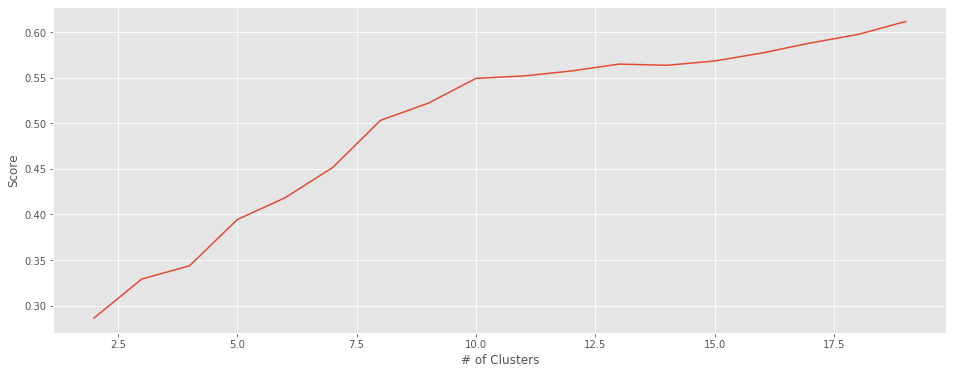

Max Value:
Cluster #    Cluster Score
2       1.581267

Min Value:
Cluster #     Cluster Score
18       0.665221


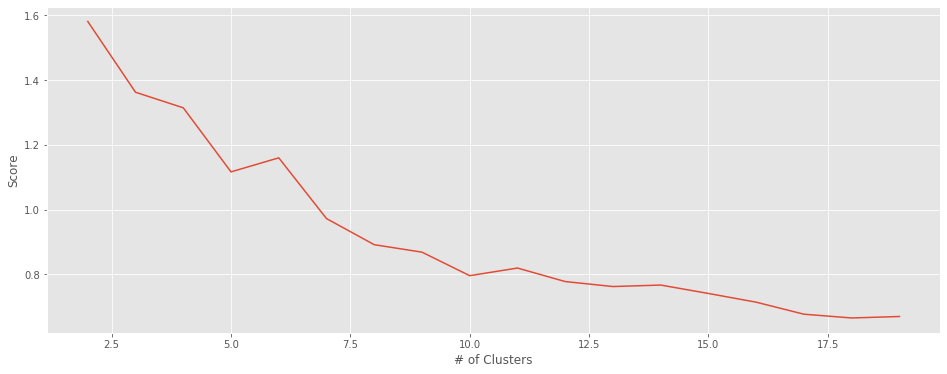

In [52]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()
    
# Running the function on the list of scores
plot_evaluation(s_scores_agg)

plot_evaluation(db_scores_agg)

plot_evaluation(s_scores_km)

plot_evaluation(db_scores_km)

In [53]:
#We will use agglomerative clustering with 19 clusters

# Instantiating KM
km = k_means(n_clusters=19)

# Fitting
km.fit(X)

# Getting cluster assignments
cluster_assignments = km.labels_

# Assigning the clusters to each profile
final_data['Cluster'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
final_data

,gender,fav_food,fav_sports,fav_song,country_living_in,country_of_origin,education,family_size,height,marriage_history,occupation,weight,Cluster
id,,,,,,,,,,,,,
1000,Female,Biryani,Soccer,Pop,USA,Indonesia,Bachelors,5,5.33,Never,Radiologic technologist,154,0
968,Female,Pizza,Cricket,Pop,USA,USA,Master,5,5.33,Never,Brand manager,140,2
1103,Male,Sweet and Sour Chicken,Basketball,Blues,USA,USA,Bachelors,10,6.00,Never,Systems engineer,211,3
975,Female,Pizza,Soccer,Pop,USA,USA,Master,3,5.33,Never,Brand manager,145,11
979,Female,Pizza,Soccer,Pop,USA,USA,Master,7,5.25,Never,Brand manager,132,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Female,Pizza,Cricket,Pop,USA,USA,Master,7,5.50,Never,Brand manager,111,2
1011,Female,Biryani,Soccer,Pop,USA,India,Bachelors,4,5.25,Never,Radiologic technologist,110,12
957,Female,Biryani,Cricket,Classic,USA,USA,Master,7,5.33,Never,Software development manager,110,2
